This script is sourced from [train-yolov8-object-detection-on-custom-dataset.ipynb](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=CjpPg4mGKc1v). The program recommends using a high-specification GPU. If you're using Google Colab, you should first change the runtime type to TPU or another GPU option \\

**You need to install the required modules below first!**

In [ ]:
# Install list modules
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install albumentations==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


Next, import the necessary libraries

In [ ]:
# Global import
import os
import shutil
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import drive

I am using Google Colab to store the datasets, which will be obtained after being extracted from Roboflow

In [ ]:
# Mount Google Drive
drive.mount('/content/drive') # Remember to grant authentication access to your google account

# Set HOME to the desired path in Google Drive
HOME = '/content/drive/MyDrive/beyblade/train-beybladebattle-folder' # You may change to /content or your personal drive GDrive folder
print(HOME)

Mounted at /content/drive
/content/drive/MyDrive/beyblade/train-beybladebattle-folder


I'm collecting the datasets from Roboflow Universe, which I annotated myself. Here is the link: [Beyblade Datasets](https://universe.roboflow.com/personalihsanworkspace/beyblade-battle-piifc). \\
The images are taken from [Super Beyblade Family's Youtube](https://youtu.be/CIfr5618vy4?si=sR3mJBV1KQUJNjeE) video.
\
The Roboflow dataset format works on YOLOv8.

In [ ]:
# Create datasets folder
!mkdir {HOME}/datasets

# Move current directory to extract datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="VRnZS6woQjcXlMgDqO4Y")
project = rf.workspace("personalihsanworkspace").project("beyblade-battle-piifc")
version = project.version(2)
dataset = version.download("yolov8")


/content/drive/MyDrive/beyblade/train-beybladebattle-folder/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Beyblade-Battle-2 in yolov8:: 100%|██████████| 2349/2349 [00:19<00:00, 119.96it/s]


After extracting or inputting the dataset, including the 'train' and 'valid' sets, you can begin to training the model

In [ ]:
# Training montage
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=150 imgsz=640 plots=True
# You can choose the model and adjust the hyperparameter settings according to your preference

/content/drive/MyDrive/beyblade/train-beybladebattle-folder
100% 6.23M/6.23M [00:00<00:00, 179MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issue

The model will be saved at **/{HOME}/runs/detect/train/weights/best.pt** . \\
Make sure to save the model.

/content/drive/MyDrive/beyblade/train-beybladebattle-folder


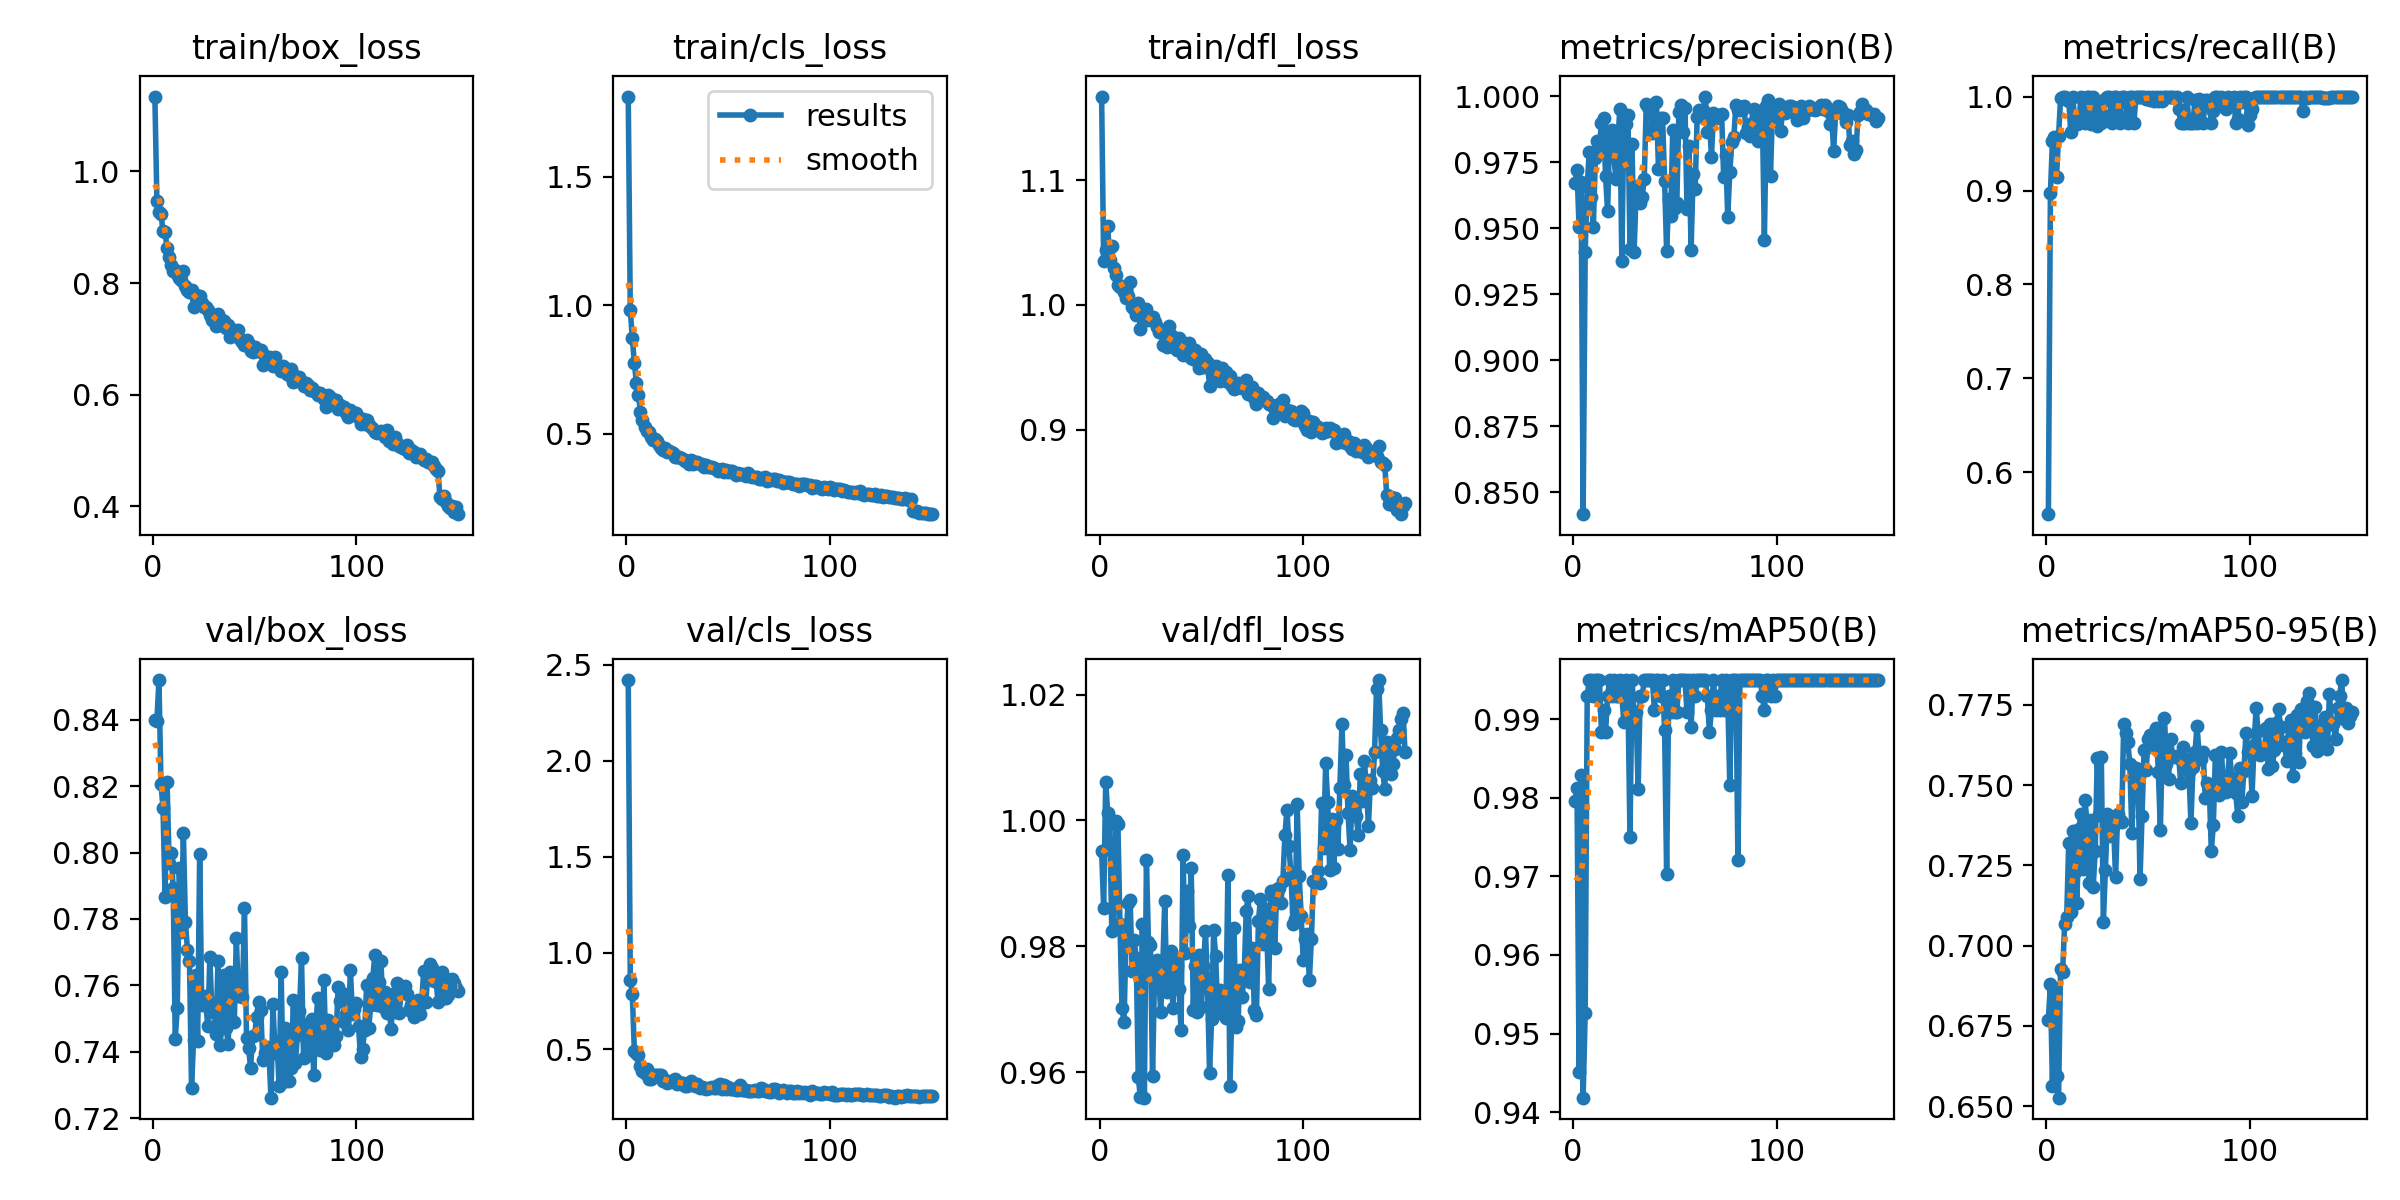

In [ ]:
# Plotting training result
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/beyblade/train-beybladebattle-folder


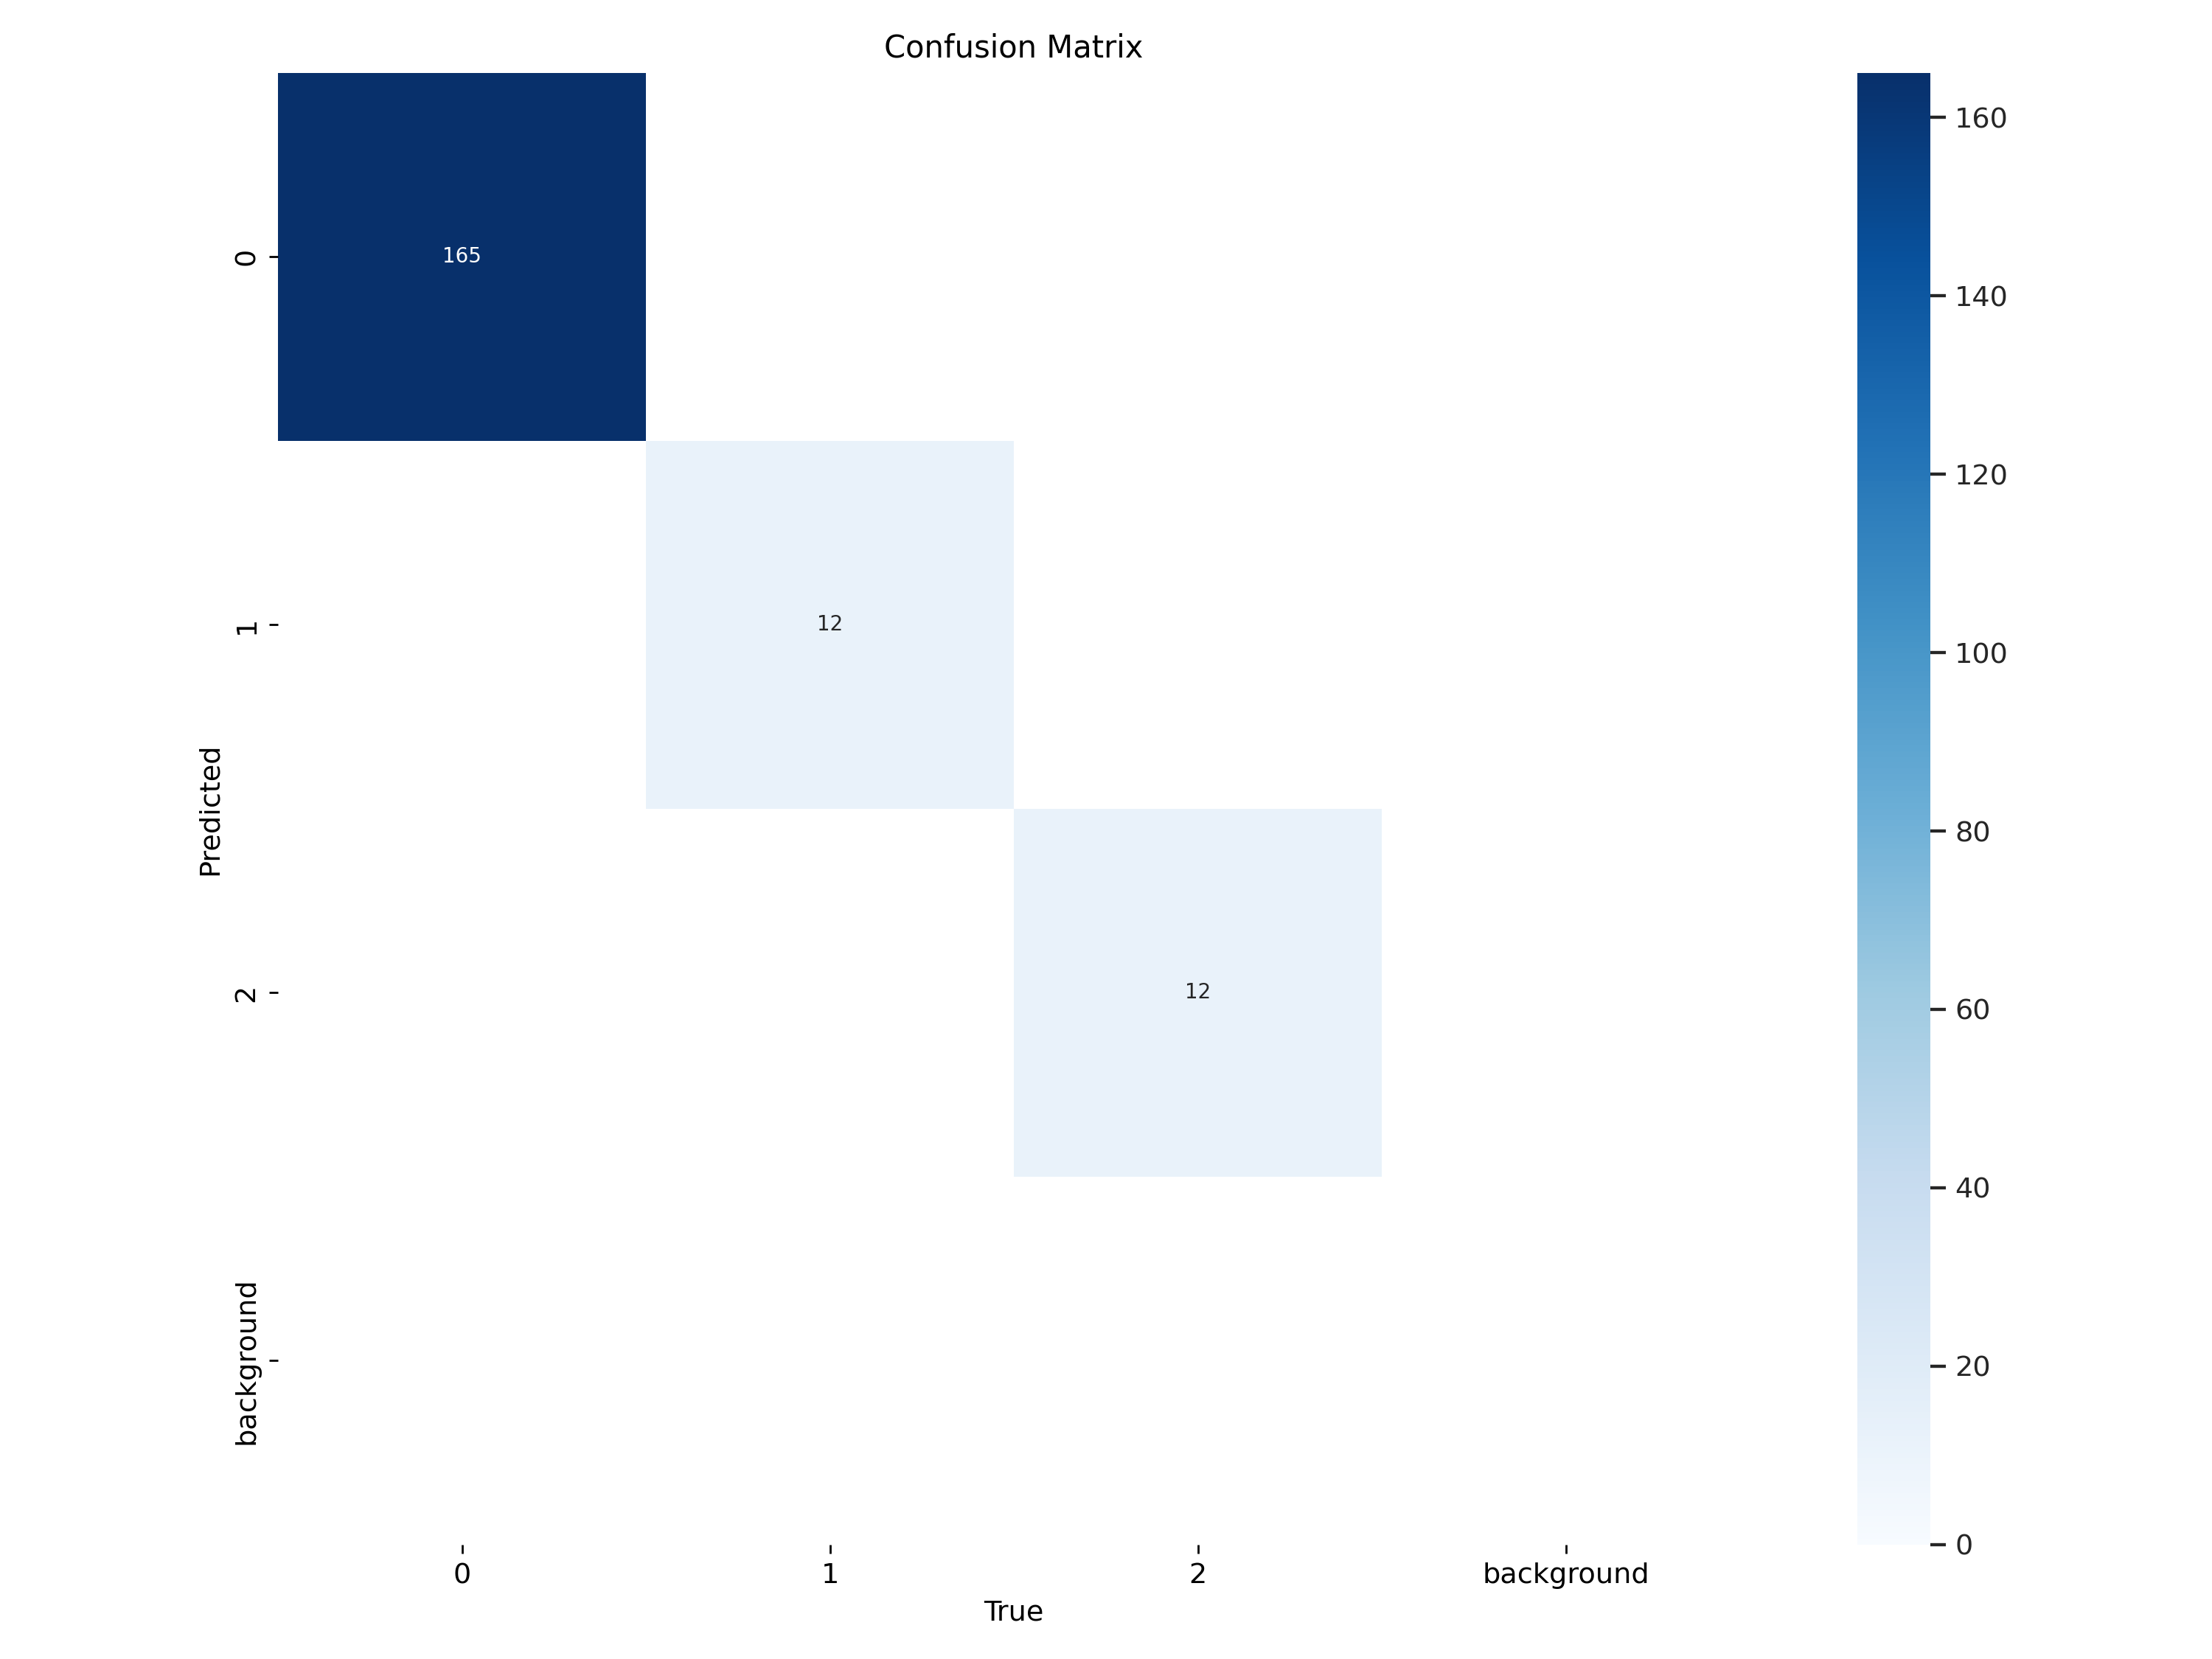

In [ ]:
# Plotting confusion matrix
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)